In [1]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 34.4 MB/s 
     |████████████████████████████████| 9.9 MB 45.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import pandas as pd
import numpy as np

In [23]:
df=pd.read_csv('/content/WindPowerForecastingData TASK1.csv',index_col='TIMESTAMP',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (16765, 5)


,TARGETVAR,U10,V10,U100,V100
TIMESTAMP,,,,,
2012-01-01 01:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076
2012-01-01 02:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761
2012-01-01 03:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093
2012-01-01 04:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546
2012-01-01 05:00:00,0.156940,2.245898,0.389576,2.957678,0.332701


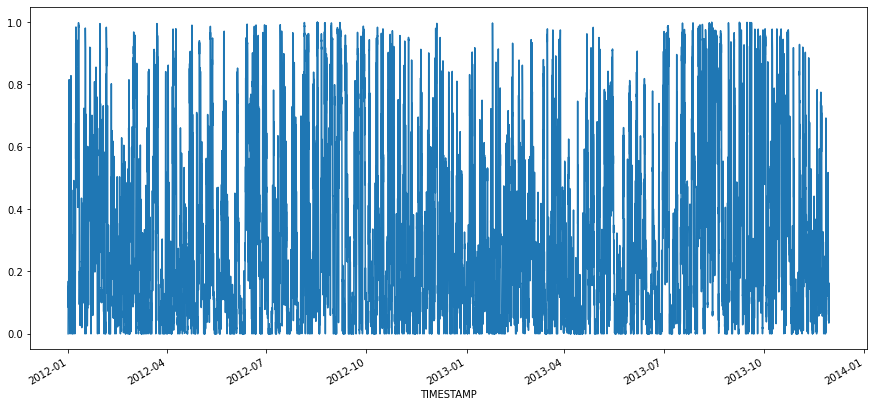

In [24]:
df['TARGETVAR'].plot(figsize=(15,7))

In [26]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [27]:
adf_test(df['TARGETVAR'])

1. ADF :  -17.161737968347772
2. P-Value :  6.83462565318232e-30
3. Num Of Lags :  24
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 16740
5. Critical Values :
	 1% :  -3.4307406991058165
	 5% :  -2.8617126734211475
	 10% :  -2.566861909665572


In [28]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [29]:
stepwise_fit = auto_arima(df['TARGETVAR'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                16765
Model:               SARIMAX(2, 1, 1)   Log Likelihood               15510.296
Date:                Fri, 18 Nov 2022   AIC                         -31010.592
Time:                        20:12:39   BIC                         -30971.957
Sample:                             0   HQIC                        -30997.843
                              - 16765                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -4.898e-05   2.87e-05     -1.706      0.088      -0.000    7.29e-06
ar.L1          1.0594      0.006    182.618      0.000       1.048       1.071
ar.L2         -0.1505      0.005    -31.316      0.000      -0.160      -0.141
ma.L1         -0.9720      0.004   -257.004      0.000      -0.979      -0.965
sigma2         0.0096   6.14e-05    156.278      0.000       0.009       0.010
===================================================================================
Ljung-Box (L1) (Q):                  29.29   Jarque-Bera (JB):             26609.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(16765, 5)
(16735, 5) (30, 5)
TARGETVAR    0.241519
U10          0.298286
V10          3.915108
U100         0.374953
V100         7.295521
Name: 2013-11-28 19:00:00, dtype: float64 TARGETVAR    0.096232
U10         -2.869353
V10          1.685961
U100        -3.871232
V100         2.200453
Name: 2013-11-30 00:00:00, dtype: float64


In [35]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['TARGETVAR'],order=(2,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              TARGETVAR   No. Observations:                16735
Model:                 ARIMA(2, 1, 1)   Log Likelihood               15574.533
Date:                Fri, 18 Nov 2022   AIC                         -31141.067
Time:                        20:19:44   BIC                         -31110.166
Sample:                             0   HQIC                        -31130.869
                              - 16735                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0327      0.005    210.078      0.000       1.023       1.042
ar.L2         -0.0963      0.005    -21.382      0.000      -0.105      -0.087
ma.L1         -0.9990      0.000  -2570.315      0.000      -1.000      -0.998
sigma2         0.0091   5.37e-05    169.516      0.000       0.009       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):             25532.28
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
print(pred)
pred.index= df.index[start:end+1]
print(pred)

16735    0.387357
16736    0.384407
16737    0.380611
16738    0.376976
16739    0.373586
16740    0.370436
16741    0.367510
16742    0.364791
16743    0.362265
16744    0.359918
16745    0.357738
16746    0.355712
16747    0.353830
16748    0.352082
16749    0.350457
16750    0.348948
16751    0.347546
16752    0.346244
16753    0.345033
16754    0.343909
16755    0.342865
16756    0.341894
16757    0.340993
16758    0.340155
16759    0.339377
16760    0.338654
16761    0.337982
16762    0.337358
16763    0.336778
16764    0.336240
Name: ARIMA predictions, dtype: float64
TIMESTAMP
2013-11-28 19:00:00    0.387357
2013-11-28 20:00:00    0.384407
2013-11-28 21:00:00    0.380611
2013-11-28 22:00:00    0.376976
2013-11-28 23:00:00    0.373586
2013-11-29 00:00:00    0.370436
2013-11-29 01:00:00    0.367510
2013-11-29 02:00:00    0.364791
2013-11-29 03:00:00    0.362265
2013-11-29 04:00:00    0.359918
2013-11-29 05:00:00    0.357738
2013-11-29 06:00:00    0.355712
2013-11-29 07:00:00    0.3

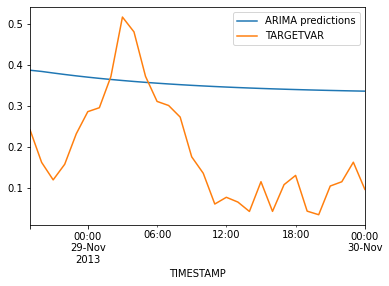

In [44]:
pred.plot(legend='ARIMA Predictions')
test['TARGETVAR'].plot(legend=True)

In [42]:
test['TARGETVAR'].mean()

0.1876546649666667

In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['TARGETVAR']))
print(rmse)

0.20672459522190198


In [47]:
model2=ARIMA(df['TARGETVAR'],order=(2,1,1))
model2=model2.fit()
df.tail()

,TARGETVAR,U10,V10,U100,V100
TIMESTAMP,,,,,
2013-11-29 20:00:00,0.034301,-2.014530,1.793392,-4.502124,3.949871
2013-11-29 21:00:00,0.104407,-3.366064,2.831022,-4.991581,4.218858
2013-11-29 22:00:00,0.114839,-3.433361,2.457599,-4.796116,3.407203
2013-11-29 23:00:00,0.162579,-3.224261,2.049055,-4.407834,2.755195
2013-11-30 00:00:00,0.096232,-2.869353,1.685961,-3.871232,2.200453


In [48]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    0.104018
2018-12-31    0.118452
2019-01-01    0.132607
2019-01-02    0.145834
2019-01-03    0.158130
2019-01-04    0.169553
2019-01-05    0.180165
2019-01-06    0.190023
2019-01-07    0.199181
2019-01-08    0.207689
2019-01-09    0.215592
2019-01-10    0.222934
2019-01-11    0.229754
2019-01-12    0.236090
2019-01-13    0.241976
2019-01-14    0.247444
2019-01-15    0.252523
2019-01-16    0.257242
2019-01-17    0.261626
2019-01-18    0.265698
2019-01-19    0.269481
2019-01-20    0.272995
2019-01-21    0.276259
2019-01-22    0.279292
2019-01-23    0.282109
2019-01-24    0.284727
2019-01-25    0.287158
2019-01-26    0.289417
2019-01-27    0.291515
2019-01-28    0.293464
2019-01-29    0.295275
Freq: D, Name: ARIMA Predictions, dtype: float64


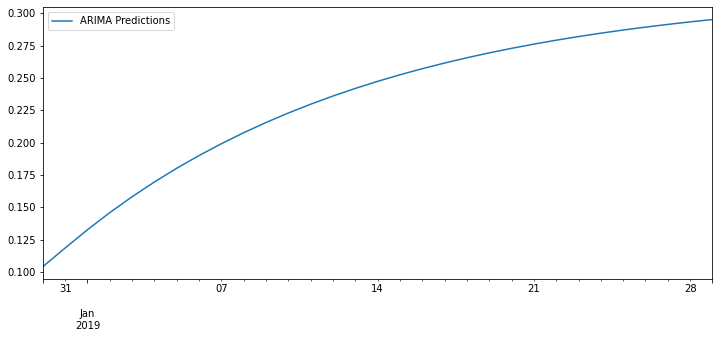

In [49]:
pred.plot(figsize=(12,5),legend=True)